# ASTR 596: FDS Homework 6: Hunting for Exoplanets


### If you are watching Star Trek: Picard, then you might wonder about the "Admonition" - a warning/message left in an octuple planet system about past synthetic life in the Galaxy.

### [Ethan Siegel's Starts With a Bang blog has even covered it](https://www.forbes.com/sites/startswithabang/2020/03/19/is-star-trek-picards-hypothesized-octuple-star-system-really-possible/)

### The Kepler satellite has discovered many multi-planet systems. You can download artwork for some of them even at the [Exoplanet Travel Bureau](https://exoplanets.nasa.gov/alien-worlds/exoplanet-travel-bureau/)

<img src="Kepler-186f_small.jpg">


### But is there a system with 8 planets??? In fact, there may be at least one - [Kepler 90](https://www.nytimes.com/2017/12/14/science/eight-planets-star-system.html). This along with most other Kepler planets, were not discovered through radial velocity measurements like our example in class (i.e. that nice parameteric model doesn't apply), but were rather discovered through transits - dips in the light of the star as the planet moves around it.


<img src="Transiting-Exoplanet-Light-Curve.gif">

### You get to find 3 exoplanets in the Kepler-90 system with `gatspy`. 


### To get the Kepler data, you'll need the `lightkurve` package

> `conda install lightkurve`

### I've included some code to get the light curve, clean it and remove the NaNs, but not outliers (you can judge the wisdom of outlier removal when you are hunting for planets).


<hr>

#### Hints:

* `gatspy` has a `predict` method that you can use to get a model light curve for some period (you should need no more 3-5 terms). You might find it easier to remove the signal of each planet as you find it and work with the residual light curve to find the next.

* `lightkurve` has a bunch of useful [tutorials](https://docs.lightkurve.org/index.html)

* [The Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/index.html) might be of help

<hr>

# Happy (planet) hunting!

In [3]:
!pip install lightkurve

     |████████████████████████████████| 501kB 2.5MB/s eta 0:00:01
     |████████████████████████████████| 235kB 12.7MB/s eta 0:00:01
     |████████████████████████████████| 4.5MB 10.8MB/s eta 0:00:01
  Created wheel for uncertainties: filename=uncertainties-3.1.2-cp37-none-any.whl size=96458 sha256=4c9425eab312d82843e5748e075c4f36af8287fcc054172adf3bf533877859fe
  Stored in directory: /home/thirty-oner/.cache/pip/wheels/d9/d3/0e/5b0b743a8abd50373705427438456da5dc2621891138d7a618
  Created wheel for astroquery: filename=astroquery-0.4-cp37-none-any.whl size=3582511 sha256=657a3993768ccc15e2f3d8c20e5a48a1b2cb802087e83f86b229be35f8805515
  Stored in directory: /home/thirty-oner/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
  Created wheel for bs4: filename=bs4-0.0.1-cp37-none-any.whl size=1273 sha256=b4fbdf81fce26570777dc16011b36b5ca784e81414e8a9ba55e75b1a994f1c41
  Stored in directory: /home/thirty-oner/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d522

  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=c19526ffc4796b64a2d9556eafd82a5e597e521032b3b06e14b7ce7737e4f848
  Stored in directory: /home/thirty-oner/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for autograd: filename=autograd-1.3-cp37-none-any.whl size=47990 sha256=2df4b3f17d5bbab093ba0ec926f3b25a1f26fca5691e7dacbb83e5d9de0bee76
  Stored in directory: /home/thirty-oner/.cache/pip/wheels/42/62/66/1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
Successfully built uncertainties astroquery bs4 oktopus fbpca autograd


In [1]:
%matplotlib inline
import lightkurve as lk
import gatspy

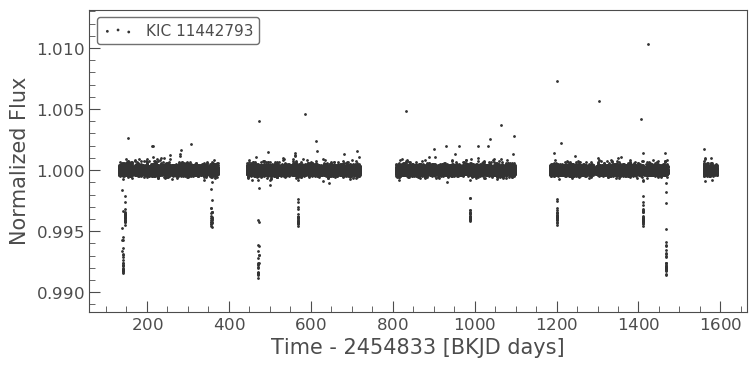

In [2]:
lcfs = lk.search_lightcurvefile('Kepler-90', mission='Kepler').download_all()

def squelch_rednoise(lc):
    corrected_lc = lc.normalize().flatten(window_length=51)
    return corrected_lc

stitched_lc = lcfs.PDCSAP_FLUX.stitch(corrector_func=squelch_rednoise)
clc = stitched_lc.remove_nans()

clc.scatter();

In [3]:
clc.time, clc.flux

(array([ 131.51243946,  131.53287376,  131.55330797, ..., 1590.96091289,
        1590.98134703, 1591.00178137]),
 array([0.99988999, 1.00014328, 0.99998635, ..., 1.00004946, 1.00009939,
        1.00003396]))

In [4]:
len(clc.time)

51503

In [5]:
pg=clc.to_periodogram()

In [6]:
pg.period, pg.power

(<Quantity [7.29744671e+03, 3.64872335e+03, 2.43248224e+03, ...,
            4.08676305e-02, 4.08674017e-02, 4.08671728e-02] d>,
 <Quantity [2.07814463e-05, 2.05830885e-05, 2.02122937e-05, ...,
            2.09168685e-06, 2.31158438e-06, 2.59016915e-06]>)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
time=clc.time
flux=clc.flux
df=clc.flux_err

print(len(time))

ind=(flux<=1.001)

time=time[ind]
flux=flux[ind]
df=df[ind]

print(len(time))

51503
51455


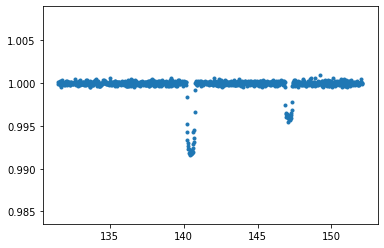

In [9]:
plt.scatter(time[:1000],flux[:1000],marker='.')

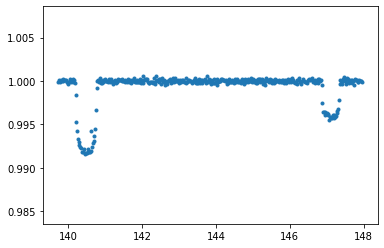

In [10]:
plt.scatter(time[400:800],flux[400:800],marker='.')

210


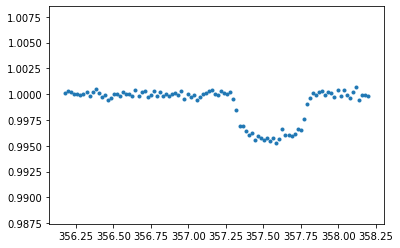

In [11]:
plt.scatter(time[10000:10100],flux[10000:10100],marker='.') 
#147, 357.5
print(357-147)

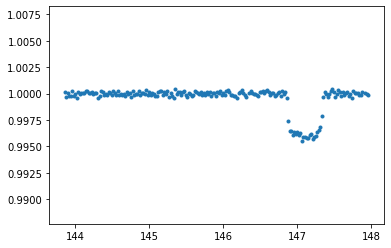

In [12]:
plt.scatter(time[600:800],flux[600:800],marker='.')

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import pandas as pd
import corner
from collections import namedtuple
from scipy import optimize
from gatspy.periodic import LombScargleFast
import emcee

In [23]:
params=namedtuple('params',['t0','p','dt','depth','s'])

In [24]:
a=np.array([1,2,3,4])
b=a>2.5
print(b)
c=a<1.5
print(c)
b=b+c
print(b)
b= np.invert(b)

a[b]=0

a

[False False  True  True]
[ True False False False]
[ True False  True  True]


array([1, 0, 3, 4])

In [25]:
#@np.vectorize
def transit(t,theta):
    t0=theta[0]
    p=theta[1]
    dt=theta[2]
    depth=theta[3]
    
    f=np.ones(len(t))
    
    for i in range(int((np.max(t)-np.min(t)-t0)//p+1)):
        ind_a=(t<(t0+i*p))
        ind_b=(t>(t0+i*p+dt))
        
        ind=ind_a+ind_b
        ind=np.invert(ind)
        
        f[ind]=depth
        
    return f
    

(0.98, 1.01)

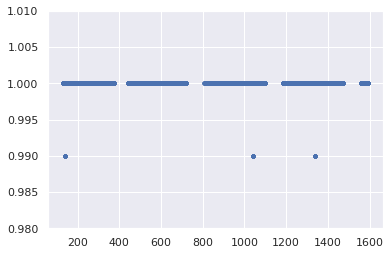

In [26]:
tra=transit(time,theta=[140,300,0.6,0.99,0.1])
plt.scatter(time,tra,marker='.')
plt.ylim(0.98,1.01)

In [27]:
theta_lim = params(t0=(130, 230),
                   p=(200, 500),
                   dt=(0.2, 1.0),
                   depth=(0.99,1),
                   s=(0.001, 100))
theta_min, theta_max = map(np.array, zip(*theta_lim))

In [28]:
def log_prior(theta):
    if np.any(theta < theta_min) or np.any(theta > theta_max):
        return -np.inf # log(0)
    
    # Jeffreys Prior on T, K, and s
    return 0 #-np.sum(np.log(theta[[0, 1, 4]]))

def log_likelihood(theta, t, rv, rv_err):
    sq_err = rv_err ** 2 + theta[4] ** 2
    rv_model = transit(t, theta)
    return -0.5 * np.sum(np.log(sq_err) + (rv - rv_model) ** 2 / sq_err)

def log_posterior(theta, t, rv, rv_err):
    ln_prior = log_prior(theta)
    if np.isinf(ln_prior):
        return ln_prior
    else:
        return ln_prior + log_likelihood(theta, t, rv, rv_err)
    
def make_starting_guess(t, rv, rv_err):
    model = LombScargleFast()
    model.optimizer.set(period_range=theta_lim.p,
                        quiet=True)
    model.fit(t, rv, rv_err)

    rv_range = 0.5 * (np.max(rv) - np.min(rv))
    rv_center = np.mean(rv)
    return params(t0=140,
                  p=model.best_period,
                  dt=0.6,
                  depth=0.992,
                  s=rv_err.mean())

In [29]:
theta_guess = make_starting_guess(time, flux, df)
theta_guess

ndim = len(theta_guess)  # number of parameters in the model
nwalkers = 10  # number of MCMC walkers

# start with a tight distribution of theta around the initial guess
rng = np.random.RandomState(42)
starting_guesses = theta_guess * (1 + 0.1 * rng.randn(nwalkers, ndim))

# RUN MCMC - YOUR CODE HERE
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(time, flux, df))
sampler.random_state = rng
pos, prob, state = sampler.run_mcmc(starting_guesses, 1000)


/home/thirty-oner/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


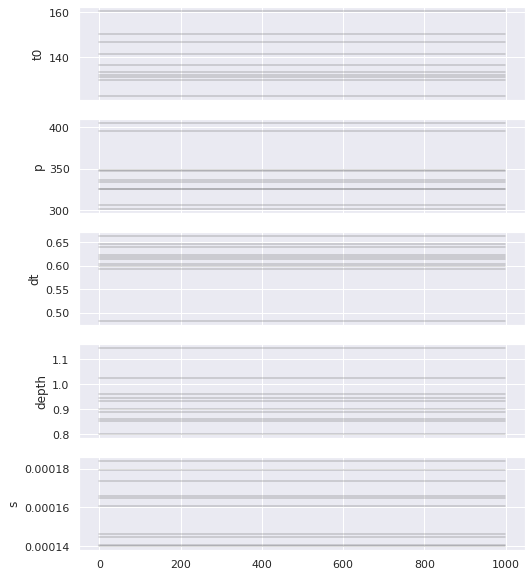

In [30]:
def plot_chains(sampler):
    fig, ax = plt.subplots(ndim, figsize=(8, 10), sharex=True)
    for i in range(ndim):
        ax[i].plot(sampler.chain[:, :, i].T, '-k', alpha=0.2);
        ax[i].set_ylabel(params._fields[i])

        
# PLOT YOUR CHAINS - YOUR CODE HERE
plot_chains(sampler)

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF as SquaredExponential

In [15]:
h = 10.0

kernel = SquaredExponential(length_scale=h, length_scale_bounds=(0.01, 1000.0))
gp0 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,alpha=(df[:1000] / flux[:1000]) ** 2)

In [16]:
from sklearn import preprocessing

In [17]:
flux_scaled=preprocessing.scale(flux)

In [37]:
gp0.fit(time[:1000,None], flux_scaled[:1000])



GaussianProcessRegressor(alpha=array([3.11383228e-08, 3.11608726e-08, 3.11739898e-08, 3.10962748e-08,
       3.11537330e-08, 3.11712148e-08, 3.10776952e-08, 3.12437376e-08,
       3.11525265e-08, 3.12334766e-08, 3.11472091e-08, 3.11425329e-08,
       3.11707973e-08, 3.11594782e-08, 3.11425991e-08, 3.11877219e-08,
       3.11178190e-08, 3.11089694e-08, 3.11949792e-08, 3.11073815e-08,
       3.11811651e-...
       3.10698188e-08, 3.11169330e-08, 3.11175063e-08, 3.10794855e-08,
       3.11418579e-08, 3.11059577e-08, 3.10929257e-08, 3.11140518e-08,
       3.11463896e-08, 3.10665661e-08, 3.10559373e-08, 3.11005873e-08,
       3.11324860e-08, 3.11345062e-08, 3.10984594e-08, 3.11151075e-08]),
                         copy_X_train=True, kernel=RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [38]:
xgrid = np.atleast_2d(np.linspace(np.min(time), np.max(time[:1000]), 1000)).T

In [39]:
yfit,yerrfit=gp0.predict(xgrid,return_std=True)

In [18]:
def gp_plot(ax, xx, yy, ee, datax, datay, datae, samples, legend=True):
    ax.cla()
    ax.plot(xx, yy, '-', color='gray', label='Posterior mean $y(x)$')
    ax.fill(np.concatenate([xx, xx[::-1]]),
            np.concatenate([(yy - ee), (yy + ee)[::-1]]),
            alpha=0.3, fc='gray', ec='None', label='68% confidence interval')
    ax.errorbar(datax, datay, datae, fmt='.k', ms=6, label='Noisy constraints')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y(x)$')
    ax.plot(xgrid, samples[:,0], '-r')
    ax.plot(xgrid, samples[:,1], '-g')
    ax.plot(xgrid, samples[:,2], '-b', label='Posterior sample $y(x)$')
    if legend: ax.legend(fontsize=8)
    return

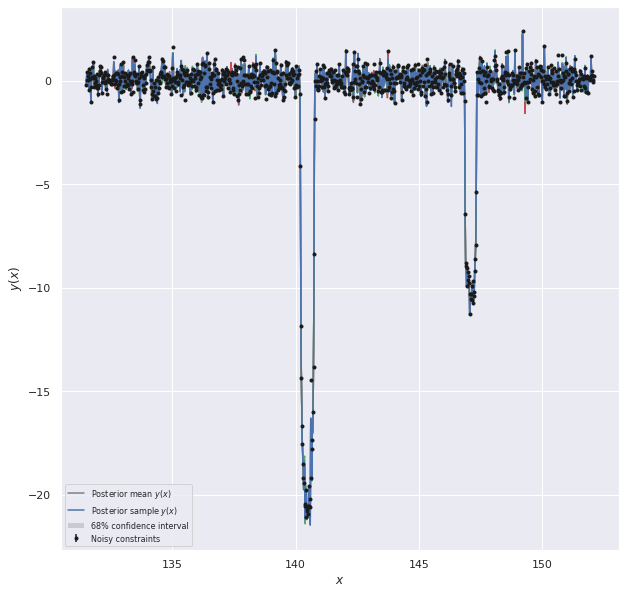

In [40]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


draws = gp0.sample_y(xgrid, n_samples=3)

def gp_plot(ax, xx, yy, ee, datax, datay, datae, samples, legend=True):
    ax.cla()
    ax.plot(xx, yy, '-', color='gray', label='Posterior mean $y(x)$')
    ax.fill(np.concatenate([xx, xx[::-1]]),
            np.concatenate([(yy - ee), (yy + ee)[::-1]]),
            alpha=0.3, fc='gray', ec='None', label='68% confidence interval')
    ax.errorbar(datax, datay, datae, fmt='.k', ms=6, label='Noisy constraints')
    
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y(x)$')
    ax.plot(xgrid, samples[:,0], '-r')
    ax.plot(xgrid, samples[:,1], '-g')
    ax.plot(xgrid, samples[:,2], '-b', label='Posterior sample $y(x)$')
    if legend: ax.legend(fontsize=8)
    return

gp_plot(ax, xgrid, yfit, yerrfit, time[:1000], flux_scaled[:1000], df[:1000], draws, legend=True)

1387


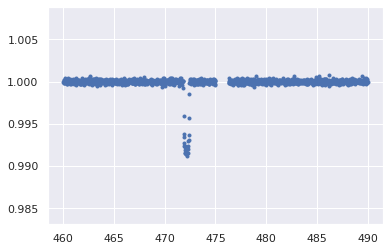

In [53]:
inda=time<460
indb=time>490

ind=inda+indb
ind=np.invert(ind)

print(len(time[ind]))

plt.scatter(time[ind],flux[ind],marker='.')

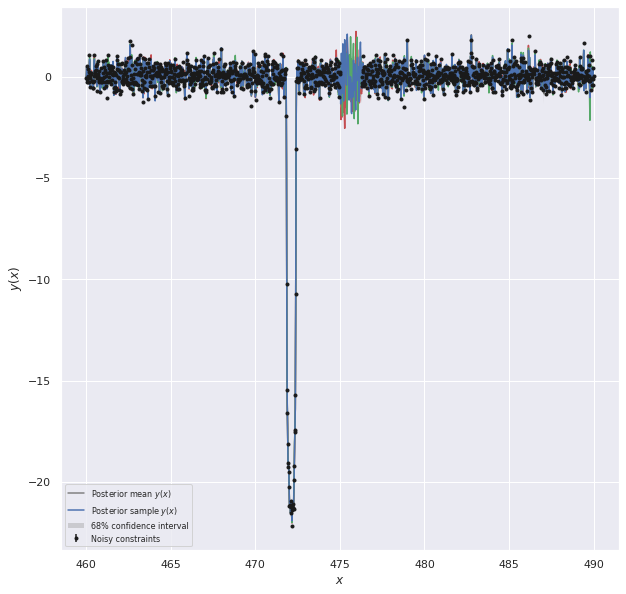

In [55]:
h = 10.0

kernel = SquaredExponential(length_scale=h, length_scale_bounds=(0.01, 1000.0))
gp0 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,alpha=(df[ind] / flux[ind]) ** 2)

gp0.fit(time[ind,None], flux_scaled[ind])
xgrid = np.atleast_2d(np.linspace(np.min(time[ind]), np.max(time[ind]), len(time[ind]))).T
yfit,yerrfit=gp0.predict(xgrid,return_std=True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


draws = gp0.sample_y(xgrid, n_samples=3)

gp_plot(ax, xgrid, yfit, yerrfit, time[ind], flux_scaled[ind], df[ind], draws, legend=True)

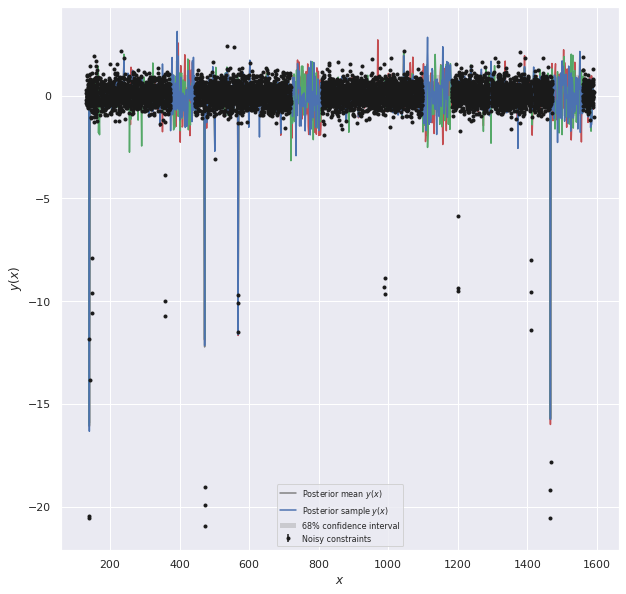

In [19]:
tm=time[::8]
fm=flux[::8]
dfm=df[::8]

fms=preprocessing.scale(fm)

h = 1.0

kernel = SquaredExponential(length_scale=h, length_scale_bounds=(0.1, 100.0))
gp0 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,alpha=(dfm / fm) ** 2)

gp0.fit(tm[:,None], fms[:])
xgrid = np.atleast_2d(np.linspace(np.min(tm[:]), np.max(tm[:]), 1000)).T
yfit,yerrfit=gp0.predict(xgrid,return_std=True)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)


draws = gp0.sample_y(xgrid, n_samples=3)

gp_plot(ax, xgrid, yfit, yerrfit, tm[:], fms[:], dfm[:], draws, legend=True)

In [25]:
model=gatspy.periodic.SuperSmoother(fit_period=True)
model.optimizer.period_range=(100,500)


In [26]:
xs=np.linspace(np.min(tm[:]), np.max(tm[:]), 1000)

model.fit(xs,yfit,yerrfit)

Finding optimal frequency:
 - Estimated peak width = 0.00431
 - Using 5 steps per peak; omega_step = 0.000861
 - User-specified period range:  99 to 5e+02
 - Computing periods at 60 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


In [27]:
model.best_period

118.4672709727041

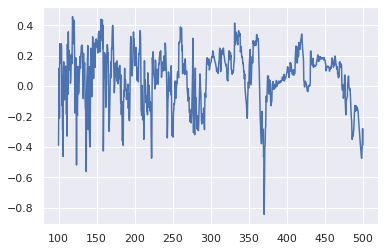

In [48]:
period=np.linspace(100, 500, 1000)
power=model.periodogram(period)

plt.plot(period,power)
#plt.xlim(200,220) # attempts at locating peaks in periodigram

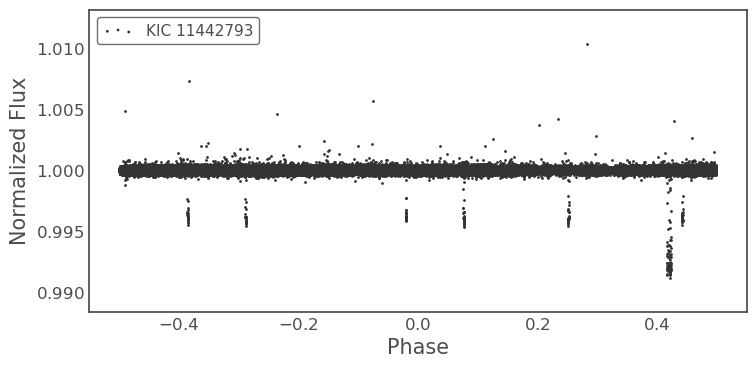

In [127]:

clc.fold(332).scatter();

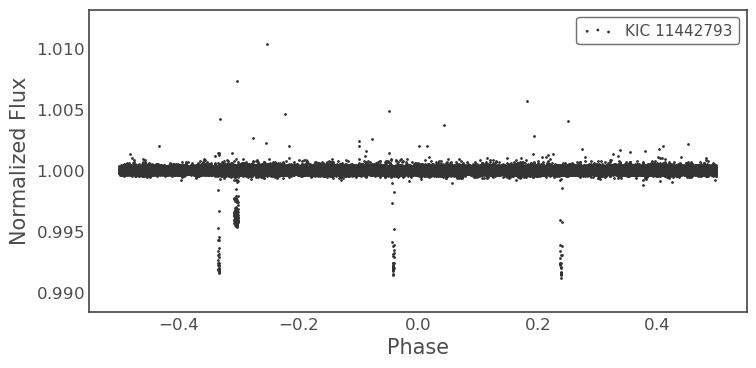

In [47]:
clc.fold(210.8).scatter()

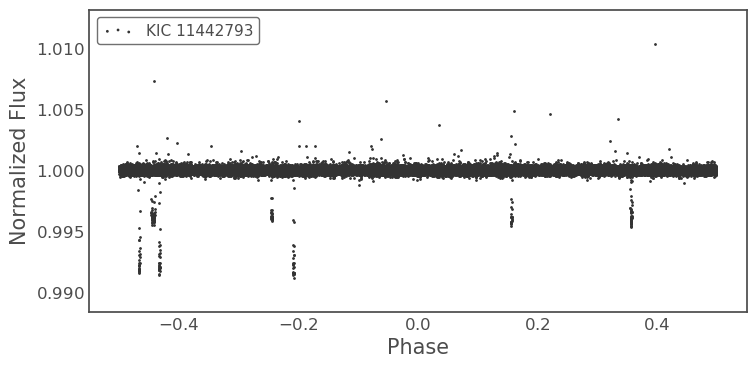

In [163]:
clc.fold(263.5).scatter()

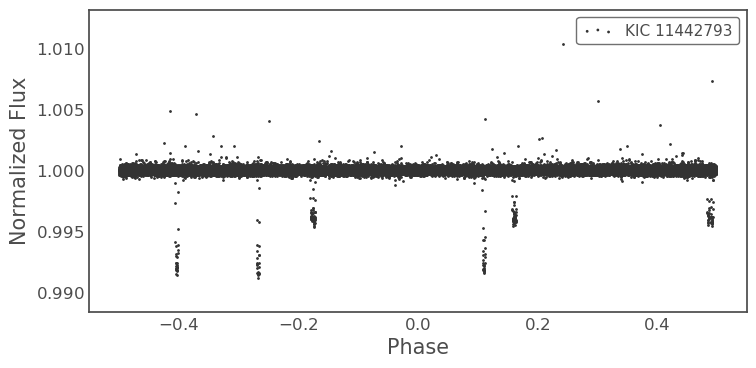

In [40]:
clc.fold(126.5).scatter()

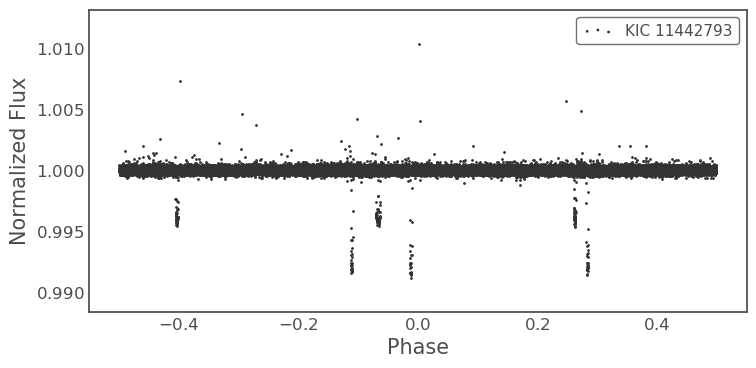

In [34]:
clc.fold(158).scatter()

#### I can confidently say that I can see 2 planets with period at around 332 days and 211 days. There are also candidates with period of 263.5 days and 126.5 days and 158 days, though I am a bit uncertain about that. These could be multiple of some of the smaller periods.

#### There is also a spike at around 360. It could be attributed to the revolution of earth.